In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import statistics
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv("data.csv")

#summarising the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
des = data.describe()
print(des)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

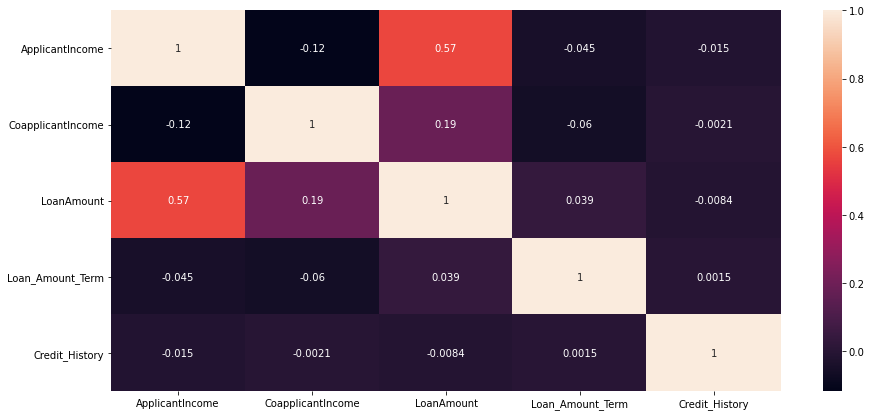

In [7]:
#checking the correlation
rcParams['figure.figsize'] = 15,7
sns.heatmap(data.corr(), annot = True)

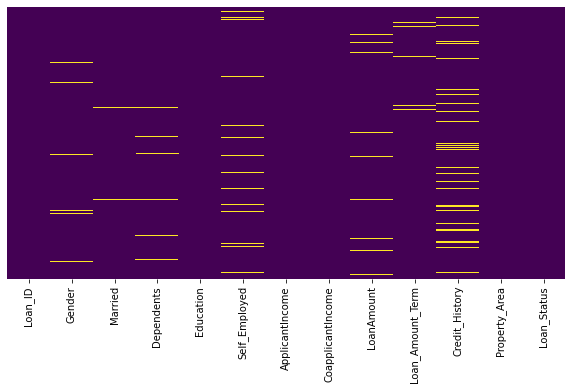

In [8]:
# Nan slots
rcParams['figure.figsize'] = 10,5
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

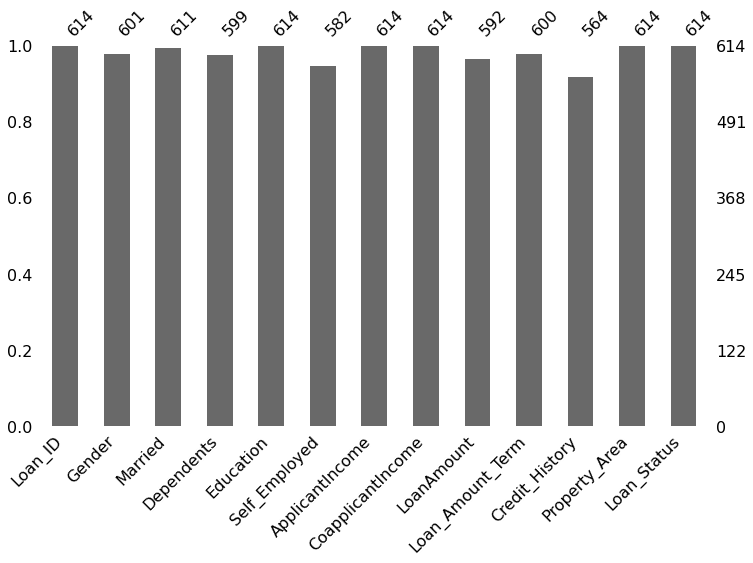

In [9]:
#no. of nan values missing out of total
msno.bar(data, figsize=(12,7))

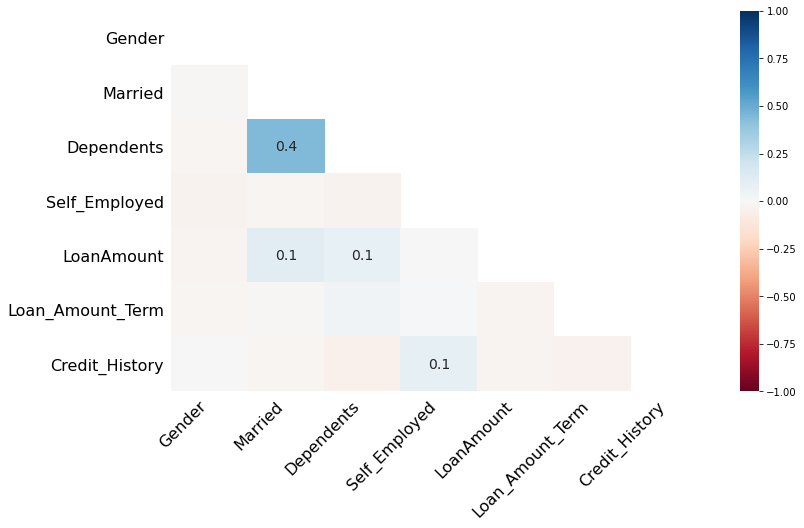

In [10]:
#visualizes the correlation matrix about the locations of missing values in columns.
msno.heatmap(data, figsize=(12,7))

In [6]:
#Analysing and imputing missing values of gender
data["Gender"].fillna(data["Gender"].mode()[0], inplace = True)

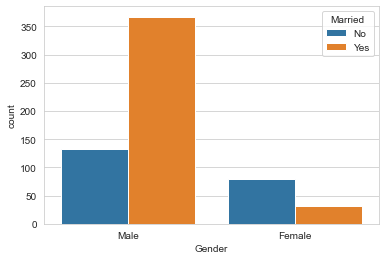

In [7]:
#Analysing and imputing missing values of  married column
sns.set_style("whitegrid")
sns.countplot(x="Gender", hue="Married", data= data)

def fillmarried(cols):
    
    gender = cols[0]
    married = cols[1]
    
    if pd.isnull(married):
        
        if gender == "Male":
            return "Yes"
        
        else:
            return "No"
        
        
    else:
        return married
    
data['Married'] = data[['Gender','Married']].apply(fillmarried,axis=1)

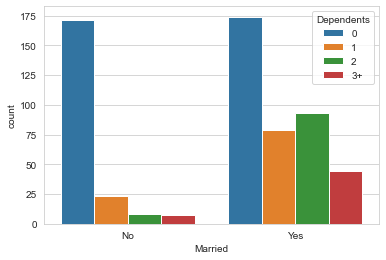

In [8]:
#Analysing and imputing missing values of dependents
sns.countplot(x="Married",hue= "Dependents", data= data)

def filldependents(cols):
    
    married = cols[0]
    dependents = cols[1]
    
    if pd.isnull(dependents):
        
        if married == "No":
           return "0"
    
    else:
        return dependents
    
data["Dependents"] = data[["Married","Dependents"]].apply(filldependents, axis= 1)        

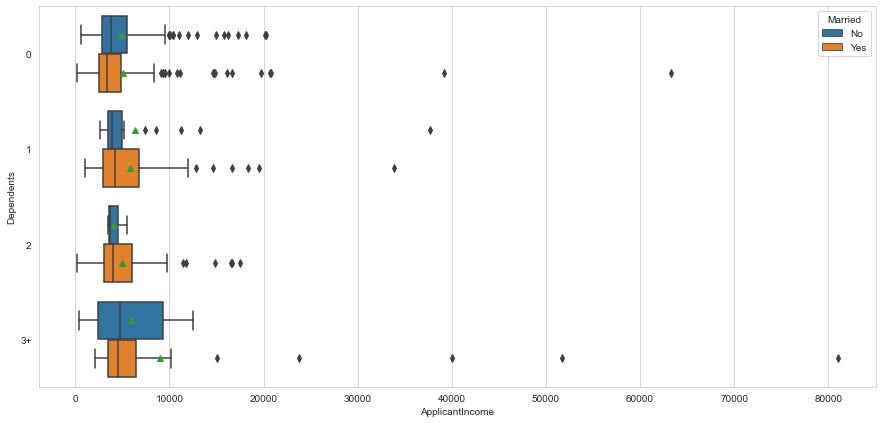

In [9]:
#Analysing and imputing missing values of dependents     
rcParams['figure.figsize'] = 15,7
sns.boxplot(x=data["ApplicantIncome"],y= data["Dependents"], hue= data["Married"], showmeans=True)


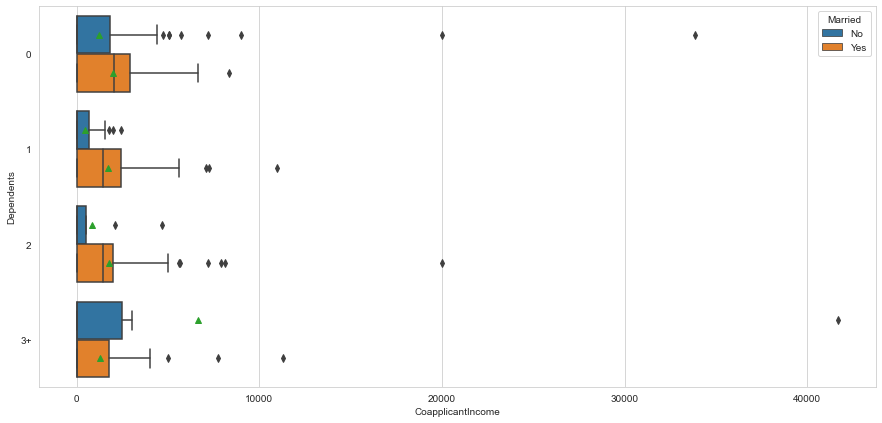

In [10]:
sns.boxplot(x=data["CoapplicantIncome"],y= data["Dependents"], hue= data["Married"], showmeans=True)

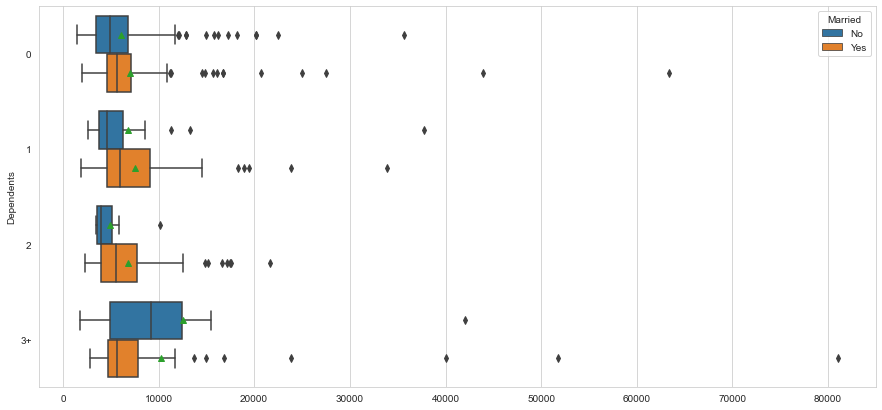

In [11]:
sns.boxplot(x= data["ApplicantIncome"] + data["CoapplicantIncome"],y= data["Dependents"], hue= data["Married"], showmeans=True)

#data["Dependents"].fillna("2", inplace = True) 
data["Dependents"].fillna("1", inplace = True) 

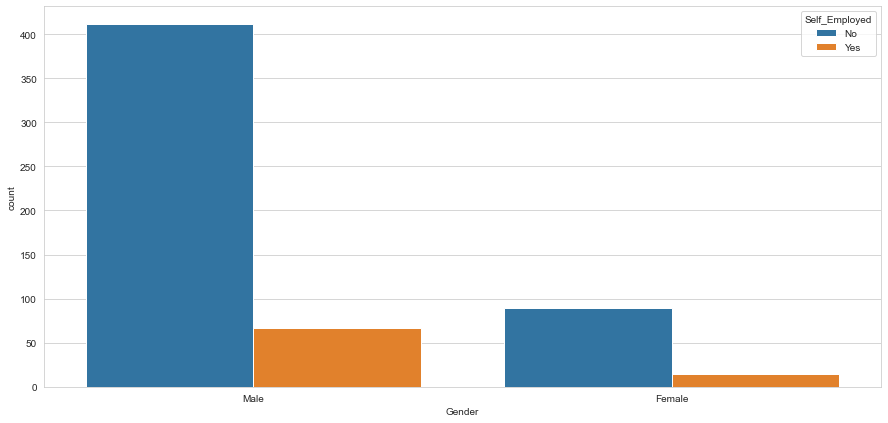

In [12]:
#Analysing and imputing missing values of Self_Employed Column
sns.countplot(x= data["Gender"], hue =data["Self_Employed"])
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0], inplace = True)

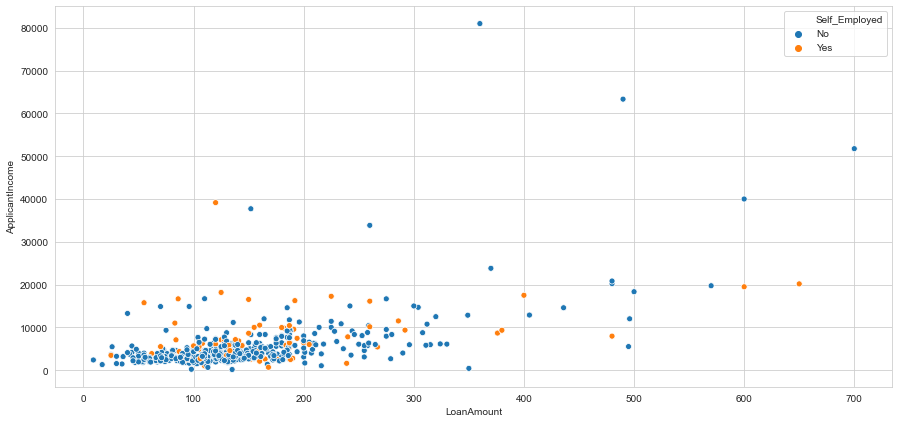

In [13]:

#Analysing and imputing missing values of Loan Amount
sns.scatterplot(x= data["LoanAmount"], y= data["ApplicantIncome"], hue= data["Self_Employed"] )

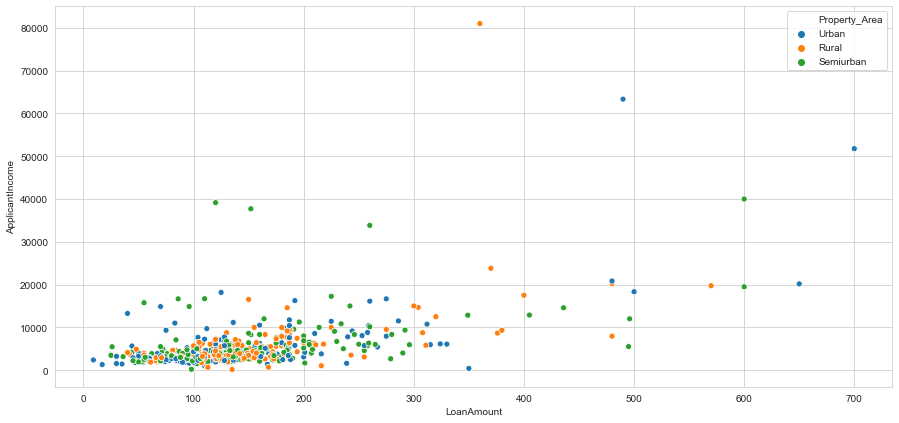

In [14]:
sns.scatterplot(x= data["LoanAmount"], y= data["ApplicantIncome"], hue= data["Property_Area"] )

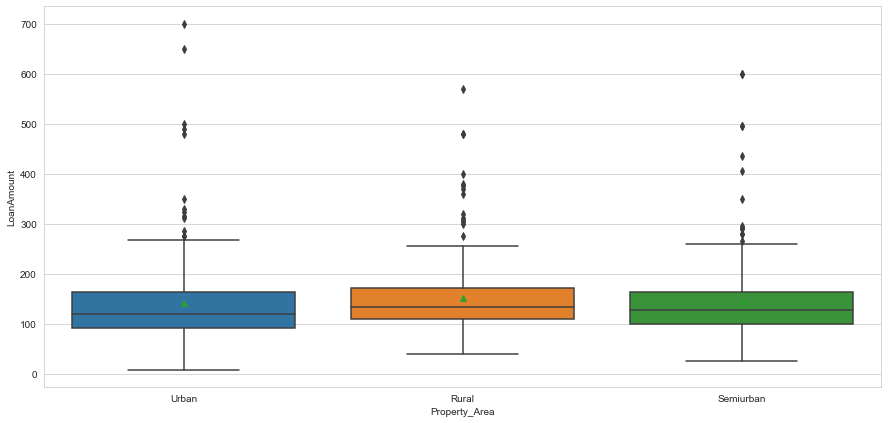

In [15]:
sns.boxplot(x=data["Property_Area"], y=data["LoanAmount"], showmeans = True )

In [16]:
#data["LoanAmount"].fillna(data["LoanAmount"].median(), inplace = True)

#finding the median for each Property area
Urban= []
Rural= []
SemiUrban= []

def Pa_La(cols):
    pa= cols[0]
    la= cols[1]
    
    if pa == "Urban":
        Urban.append(la)
        return "done"
    elif pa == "Rural":
        Rural.append(la)
        return "done"
    else: 
        SemiUrban.append(la)
        return "done"
    

data[["Property_Area","LoanAmount"]].apply(Pa_La, axis =1)
  

0      done
1      done
2      done
3      done
4      done
       ... 
609    done
610    done
611    done
612    done
613    done
Length: 614, dtype: object

In [17]:
Urban

[nan,
 66.0,
 120.0,
 141.0,
 267.0,
 95.0,
 168.0,
 70.0,
 109.0,
 200.0,
 17.0,
 125.0,
 100.0,
 76.0,
 115.0,
 104.0,
 315.0,
 110.0,
 35.0,
 201.0,
 74.0,
 nan,
 100.0,
 184.0,
 80.0,
 47.0,
 75.0,
 96.0,
 88.0,
 44.0,
 144.0,
 120.0,
 134.0,
 286.0,
 180.0,
 144.0,
 120.0,
 99.0,
 126.0,
 312.0,
 125.0,
 172.0,
 113.0,
 176.0,
 110.0,
 167.0,
 50.0,
 210.0,
 81.0,
 nan,
 133.0,
 nan,
 160.0,
 100.0,
 225.0,
 216.0,
 136.0,
 85.0,
 259.0,
 160.0,
 650.0,
 74.0,
 88.0,
 168.0,
 187.0,
 70.0,
 30.0,
 244.0,
 50.0,
 187.0,
 275.0,
 75.0,
 700.0,
 102.0,
 180.0,
 160.0,
 120.0,
 83.0,
 nan,
 135.0,
 80.0,
 59.0,
 240.0,
 137.0,
 60.0,
 138.0,
 255.0,
 122.0,
 140.0,
 155.0,
 120.0,
 112.0,
 137.0,
 90.0,
 138.0,
 192.0,
 94.0,
 330.0,
 160.0,
 90.0,
 30.0,
 136.0,
 80.0,
 158.0,
 78.0,
 54.0,
 134.0,
 143.0,
 110.0,
 135.0,
 113.0,
 93.0,
 96.0,
 nan,
 104.0,
 111.0,
 88.0,
 110.0,
 67.0,
 117.0,
 71.0,
 490.0,
 182.0,
 nan,
 158.0,
 126.0,
 116.0,
 67.0,
 100.0,
 130.0,
 95.0,
 111.0,

In [18]:
Rural

[128.0,
 114.0,
 133.0,
 112.0,
 106.0,
 320.0,
 135.0,
 165.0,
 nan,
 120.0,
 152.0,
 185.0,
 175.0,
 180.0,
 194.0,
 93.0,
 370.0,
 nan,
 182.0,
 84.0,
 129.0,
 185.0,
 225.0,
 118.0,
 152.0,
 113.0,
 160.0,
 120.0,
 158.0,
 182.0,
 112.0,
 129.0,
 95.0,
 81.0,
 116.0,
 101.0,
 67.0,
 66.0,
 58.0,
 168.0,
 188.0,
 48.0,
 120.0,
 187.0,
 55.0,
 130.0,
 135.0,
 170.0,
 200.0,
 42.0,
 120.0,
 170.0,
 112.0,
 120.0,
 108.0,
 104.0,
 255.0,
 115.0,
 304.0,
 120.0,
 151.0,
 135.0,
 126.0,
 124.0,
 nan,
 89.0,
 120.0,
 187.0,
 139.0,
 151.0,
 132.0,
 140.0,
 135.0,
 480.0,
 185.0,
 56.0,
 144.0,
 159.0,
 155.0,
 nan,
 132.0,
 300.0,
 376.0,
 130.0,
 160.0,
 176.0,
 173.0,
 46.0,
 125.0,
 152.0,
 187.0,
 308.0,
 95.0,
 105.0,
 165.0,
 141.0,
 133.0,
 124.0,
 570.0,
 380.0,
 130.0,
 125.0,
 185.0,
 275.0,
 109.0,
 65.0,
 194.0,
 66.0,
 360.0,
 218.0,
 110.0,
 112.0,
 138.0,
 121.0,
 81.0,
 87.0,
 105.0,
 138.0,
 180.0,
 175.0,
 130.0,
 110.0,
 55.0,
 150.0,
 125.0,
 149.0,
 90.0,
 136.0,
 153

In [19]:
SemiUrban

[158.0,
 349.0,
 116.0,
 151.0,
 191.0,
 122.0,
 120.0,
 114.0,
 144.0,
 110.0,
 134.0,
 144.0,
 100.0,
 120.0,
 112.0,
 97.0,
 96.0,
 116.0,
 258.0,
 136.0,
 97.0,
 81.0,
 95.0,
 187.0,
 180.0,
 130.0,
 111.0,
 nan,
 265.0,
 136.0,
 99.0,
 104.0,
 175.0,
 131.0,
 188.0,
 122.0,
 25.0,
 137.0,
 50.0,
 115.0,
 131.0,
 151.0,
 nan,
 94.0,
 139.0,
 nan,
 118.0,
 154.0,
 44.0,
 137.0,
 81.0,
 70.0,
 25.0,
 102.0,
 290.0,
 242.0,
 175.0,
 122.0,
 100.0,
 125.0,
 600.0,
 255.0,
 98.0,
 121.0,
 63.0,
 200.0,
 187.0,
 87.0,
 495.0,
 116.0,
 73.0,
 260.0,
 108.0,
 120.0,
 164.0,
 76.0,
 170.0,
 113.0,
 90.0,
 166.0,
 124.0,
 120.0,
 127.0,
 214.0,
 128.0,
 100.0,
 131.0,
 72.0,
 127.0,
 116.0,
 144.0,
 175.0,
 128.0,
 210.0,
 158.0,
 104.0,
 280.0,
 140.0,
 96.0,
 123.0,
 123.0,
 201.0,
 279.0,
 128.0,
 134.0,
 155.0,
 128.0,
 150.0,
 150.0,
 90.0,
 115.0,
 207.0,
 436.0,
 112.0,
 99.0,
 115.0,
 127.0,
 172.0,
 200.0,
 105.0,
 84.0,
 111.0,
 120.0,
 112.0,
 115.0,
 124.0,
 184.0,
 98.0,
 70.0,


In [20]:
Urban = [i for i in Urban if pd.notnull(i)]
SemiUrban = [i for i in SemiUrban if pd.notnull(i)]
Rural = [i for i in Rural if pd.notnull(i)]

#exact median values to impute in the data set
Median_Ur =statistics.median(Urban)
Median_Ru =statistics.median(Rural)
Median_SUr = statistics.median(SemiUrban)

#filling the median values
def fillloanamount(cols):
    
    pa = cols[0]
    la = cols[1]
    
    if pd.isnull(la):
        
        if pa == "Urban":
           return Median_Ur
        elif pa == "Semiurban":
           return Median_SUr
        else:
           return Median_Ru
       
    else:
          return la
    
data["LoanAmount"] = data[["Property_Area","LoanAmount"]].apply(fillloanamount, axis= 1) 

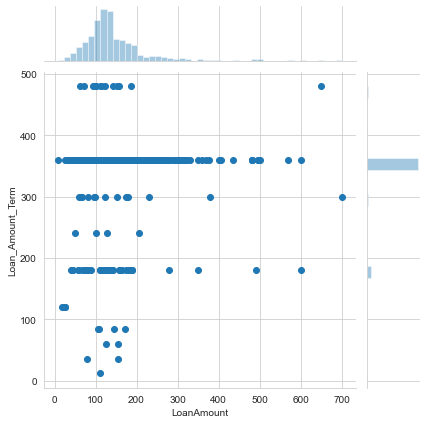

In [21]:
#Analysing and imputing missing values of Loan_Amount_Term column
sns.jointplot(x= data["LoanAmount"], y= data["Loan_Amount_Term"])

data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].median(), inplace = True)

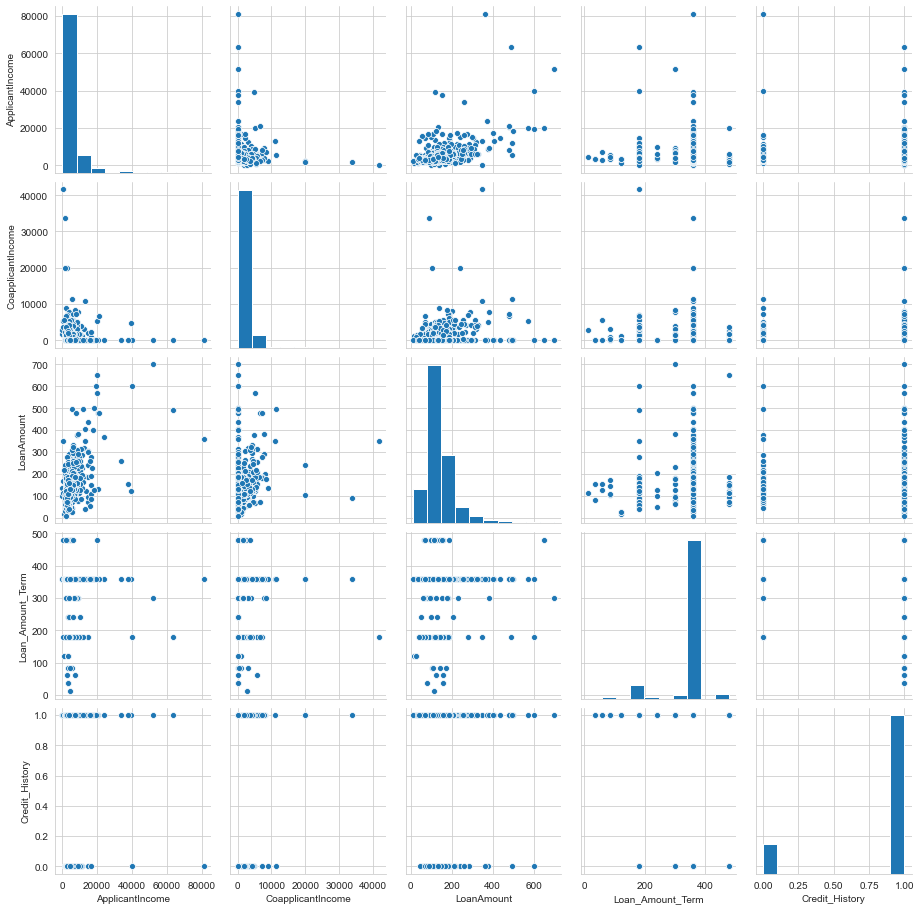

In [22]:
#Analysing and imputing missing values of credit History
sns.pairplot(data)
data["Credit_History"].fillna( data["Credit_History"].mode()[0] , inplace = True)

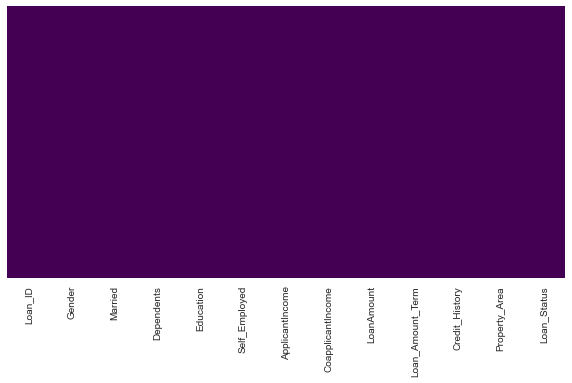

In [23]:
#checking the Nan Values
rcParams['figure.figsize'] = 10,5
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


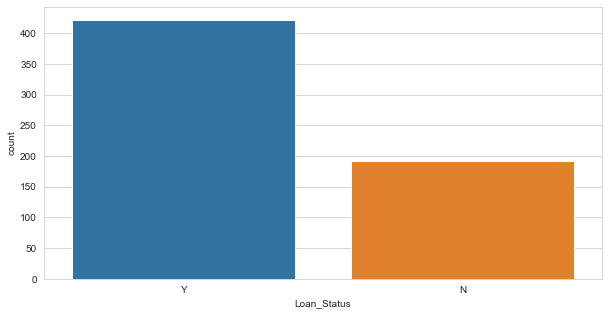

In [24]:
x = data.iloc[:,0:11]
y = data.iloc[:,-1]


#checking the if the dataset in balanced or imbalanced
sns.countplot(y)


#this is an imbalanced data set of yes:no = 1:0.5 , thus no need to use any sampling techniques
#ROS = RandomOverSampler()
#x_ros,y_ros = ROS.fit_sample(x,y)

#the data set is balanced now
#sns.countplot(y_ros)

x.info()

#dummy coding and scaling
x_dummy = x.select_dtypes(exclude= "number") 
x_dummy

columns_to_drop = x_dummy.columns

x_scaling = x.drop(columns_to_drop, axis = 1)
x_scaling

columns_scaling = x_scaling.columns

loan_id = pd.DataFrame(x_dummy.iloc[:,0])

x_dummy = pd.get_dummies(x_dummy.iloc[:,1:], drop_first = True)

X = pd.concat((x_scaling , x_dummy), axis = 1)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

scaling = StandardScaler()
x_train = scaling.fit_transform(x_train) 
x_test =  scaling.transform(x_test)

In [27]:
#1st model
#Logistic Regression
LR = LogisticRegression()
LR.get_params().keys()
lr_params = [{'solver' : ['newton-cg', 'lbfgs','sag'], 'penalty' : ['l2'], 'C' : [100, 10, 1.0, 0.1, 0.01 ], 'fit_intercept': [True,False]},
             {'solver' : ['saga'],  'penalty' : ['elasticnet'] ,'C' : [100, 10, 1.0, 0.1, 0.01 ], 'fit_intercept': [True,False],'l1_ratio':np.linspace(0,1,10) },
             {'solver' : ['liblinear'] , 'penalty' : ['l1','l2'],'C' : [100, 10, 1.0, 0.1, 0.01], 'fit_intercept': [True,False] , 'intercept_scaling' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]} ]
             

rndcv_LR = RandomizedSearchCV(estimator = LR, param_distributions = lr_params, cv = 10, n_iter = 40, scoring= "accuracy" )
rndcv_LR.fit(x_train,y_train)
print(rndcv_LR.best_params_)
LR_mean_accuracy=rndcv_LR.best_score_
print(LR_mean_accuracy)



{'solver': 'liblinear', 'penalty': 'l1', 'intercept_scaling': 0.9, 'fit_intercept': False, 'C': 10}
0.8044489795918368


              precision    recall  f1-score   support

           N       0.88      0.45      0.60        33
           Y       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



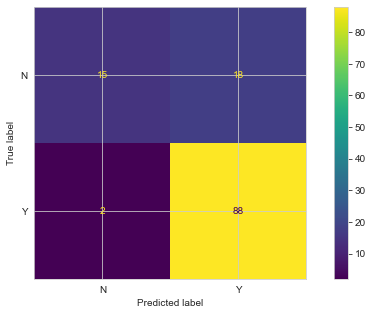

In [28]:
LR = LogisticRegression (solver = "liblinear",penalty = 'l1',intercept_scaling = 0.9, fit_intercept = False, C= 10)
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
LR_accuracy = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
plot_confusion_matrix(LR,x_test, y_test)

In [36]:
#2nd model
#KNN
KNN = KNeighborsClassifier()

knn_params= [{'algorithm': ['auto'],'n_neighbors':np.arange(start=1,stop=100,step=1),"weights":['uniform','distance'] }, 
             {'algorithm': ['ball_tree'],'n_neighbors':np.arange(start=1,stop=100,step=1),"weights":['uniform', 'distance'],"leaf_size":np.arange(start=1,stop=100,step=1)},
             {'algorithm': ['kd_tree'],'n_neighbors':np.arange(start=1,stop=100,step=1),"weights":['uniform', 'distance'],"leaf_size":np.arange(start=1,stop=100,step=1)},
             {'algorithm': ['brute'],'n_neighbors':np.arange(start=1,stop=100,step=1),"weights":['uniform', 'distance'] }]

rndcv_KNN = RandomizedSearchCV(estimator = KNN, param_distributions = knn_params, cv = 10, n_iter = 40, scoring= 'accuracy')
rndcv_KNN.fit(x_train,y_train)
print(rndcv_KNN.best_params_)
knn_mean_accuracy =rndcv_KNN.best_score_
print(knn_mean_accuracy)



{'weights': 'uniform', 'n_neighbors': 13, 'leaf_size': 98, 'algorithm': 'ball_tree'}
0.8044081632653061


              precision    recall  f1-score   support

           N       0.68      0.39      0.50        33
           Y       0.81      0.93      0.87        90

    accuracy                           0.79       123
   macro avg       0.75      0.66      0.68       123
weighted avg       0.77      0.79      0.77       123



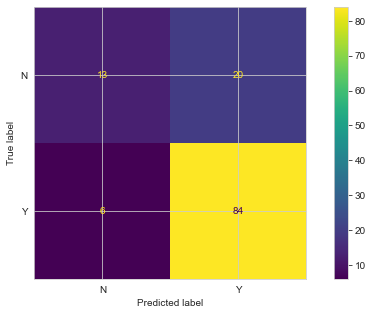

In [37]:

KNN = KNeighborsClassifier(weights = 'uniform',n_neighbors= 13,leaf_size= 98,algorithm= 'ball_tree')
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)
KNN_accuracy = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
plot_confusion_matrix(KNN,x_test, y_test)

In [38]:

#3rd model
#RandomForest
randomforest = {"n_estimators" : [10,20,30,40,50,60,70,80,90,100,150,200,300,500,1000],"max_depth" : randint(1,5),"min_samples_split" : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],"min_samples_leaf" : randint(1,5),"criterion" : ["gini","entropy"],"min_weight_fraction_leaf" : [0,0.1,0.2,0.3,0.4,0.5],"max_features" : randint(1,12),'bootstrap':[True,False]}

RF = RandomForestClassifier()

rndcv = RandomizedSearchCV(estimator = RF, param_distributions = randomforest, cv= 10, n_iter = 40 , scoring= "accuracy" )
rndcv.fit(x_train,y_train)
print(rndcv.best_params_)
RF_mean_accuracy = rndcv.best_score_
print(RF_mean_accuracy)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 0.6, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 90}
0.8044489795918366


              precision    recall  f1-score   support

           N       0.88      0.42      0.57        33
           Y       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



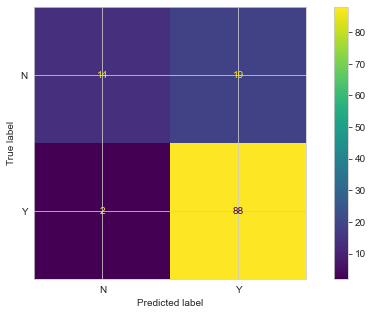

In [39]:
RF = RandomForestClassifier(bootstrap= False, criterion= 'gini', max_depth= 4, max_features= 10, min_samples_leaf= 2, min_samples_split= 0.7, min_weight_fraction_leaf= 0.1,n_estimators= 90)
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
RF_accuracy = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
plot_confusion_matrix(RF,x_test, y_test)


              precision    recall  f1-score   support

           N       0.83      0.45      0.59        33
           Y       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123



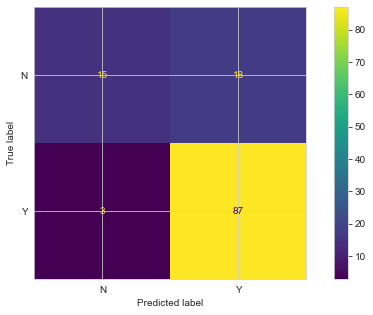

In [40]:
#4th model
#Naive Bayes

NB = GaussianNB()
NB.fit(x_train,y_train)
y_pred = NB.predict(x_test)
NB_accuracy = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
plot_confusion_matrix(NB,x_test, y_test)


In [41]:
#5th model
#Support Vector Machine
svc = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
              {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]


SVC = svm.SVC()

gdsrch = GridSearchCV(estimator = SVC,param_grid = svc,scoring = 'accuracy',cv = 10)
gdsrch.fit(x_train,y_train)
print(gdsrch.best_params_)
svc_mean_accuracy = gdsrch.best_score_
print(svc_mean_accuracy)

{'C': 1, 'kernel': 'linear'}
0.8044489795918366


              precision    recall  f1-score   support

           N       0.88      0.42      0.57        33
           Y       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



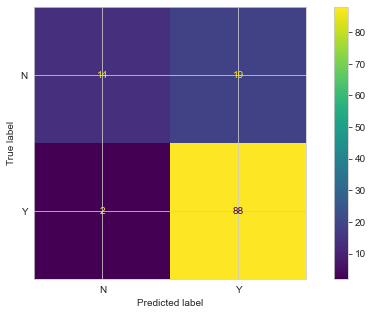

In [42]:
SVC = svm.SVC(C= 1, kernel= 'linear')
SVC.fit(x_train,y_train)
y_pred = SVC.predict(x_test)
svc_accuracy =accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
plot_confusion_matrix(SVC,x_test, y_test)


In [43]:
# achieved accuracy for testing data

print("For Logistic Regression =" + str(LR_accuracy*100))
print("For KNearest Neighbors =" + str(KNN_accuracy*100))
print("For Random Forest =" + str(RF_accuracy*100))
print("For Naive Bayes =" + str(NB_accuracy*100))
print("For Support Vector Machine =" + str(svc_accuracy*100))

For Logistic Regression =83.73983739837398
For KNearest Neighbors =78.86178861788618
For Random Forest =82.92682926829268
For Naive Bayes =82.92682926829268
For Support Vector Machine =82.92682926829268
